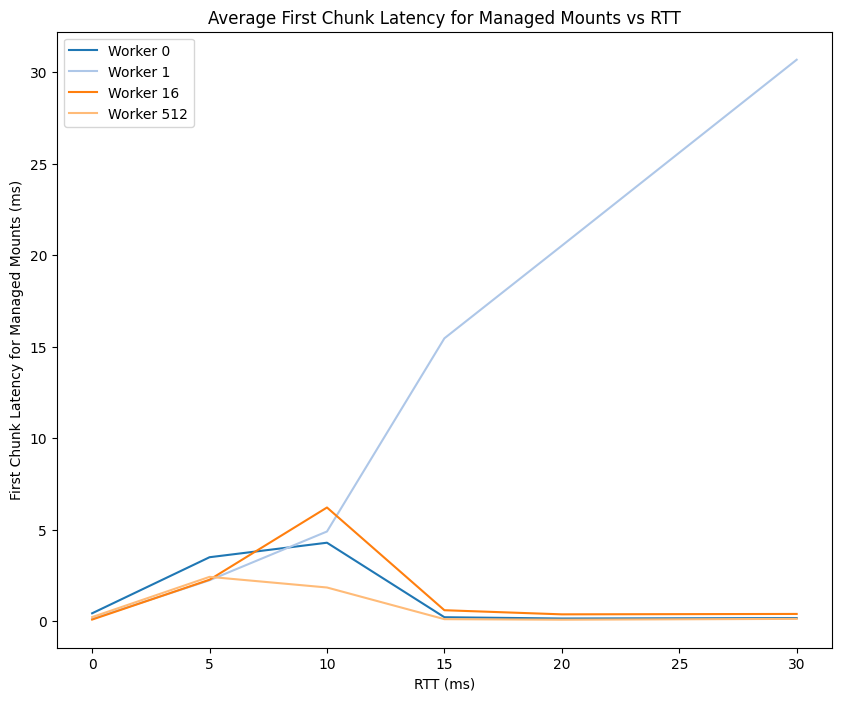

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new data
df_new3 = pd.read_csv('../bench/latency-first-chunk-workervar/results.csv')

# Forward fill the missing values
df_new3_filled = df_new3.ffill()

# Convert RTT to numeric for sorting purpose
df_new3_filled['RTT (ms)'] = df_new3_filled['RTT (ms)'].str.replace('ms', '').astype(int)

# Convert Worker counts to integers
df_new3_filled['Worker'] = df_new3_filled['Worker'].astype(int)

# Group by RTT and Worker, and calculate the mean latency
grouped_df_new3 = df_new3_filled.groupby(['RTT (ms)', 'Worker']).mean().reset_index()

# Convert nanoseconds to milliseconds
grouped_df_new3['First Chunk Latency for Managed Mounts (ms)'] = grouped_df_new3['First Chunk Latency for Managed Mounts (ns)'] / 1e6

# Use a colormap to ensure distinct colors for each line
cmap = plt.get_cmap('tab20')

# Get the number of unique workers
num_workers = grouped_df_new3['Worker'].nunique()

# Initialize a figure
plt.figure(figsize=(10, 8))

# Plot for each worker
for i, worker in enumerate(grouped_df_new3['Worker'].unique()):
    data = grouped_df_new3[grouped_df_new3['Worker'] == worker]
    plt.plot(data['RTT (ms)'], data['First Chunk Latency for Managed Mounts (ms)'], color=cmap(i % num_workers), label=f'Worker {worker}')

# Add title and labels
plt.title('Average First Chunk Latency for Managed Mounts vs RTT')
plt.xlabel('RTT (ms)')
plt.ylabel('First Chunk Latency for Managed Mounts (ms)')

# Add legend at the top left
plt.legend(loc="upper left")

# Show the plot
plt.show()